In [1]:
import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime

# Southern California

In [2]:
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2022-11-01T00:00:00") #end time of the request


minLat = 32.4
maxLat = 35.2
minLon = -121
maxLon = -114
#minLon = -95
#maxLon = -104
minMag = 5.0
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat, maxlatitude=maxLat,
minlongitude=minLon, maxlongitude=maxLon, minmagnitude=minMag)

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2022-11-29 13:03:47.955069
Download ended:  2022-11-29 13:03:58.049897


In [3]:
# print the number of EQ and print info of the most recent one (has index=0)
print(catalog)
print('Number of earthquakes', len(catalog.events))
print(catalog[0].origins[0].latitude,catalog[0].origins[0].longitude)
print(catalog[0].origins[0].time)
print(catalog[0].magnitudes[0].mag)

87 Event(s) in Catalog:
2021-06-05T17:55:58.820000Z | +33.140, -115.635 | 5.2205 Mw
2018-04-05T19:29:16.500000Z | +33.837, -119.726 | 5.3 Mww
...
1971-02-09T14:00:40.580000Z | +34.400, -118.434 | 6.2 mb
1970-09-12T14:30:51.700000Z | +34.210, -117.550 | 5.3 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'
Number of earthquakes 87
33.14 -115.634833
2021-06-05T17:55:58.820000Z
5.2205


In [4]:
#plt.hist(catalog.origins.time, bins = 50)
#catalog[0].origins[0].time
evlat =[]
evlon =[]
evdep =[]
evmag = []
index = 0
years = []
magnitudes = []

for eve in catalog:
    event = catalog[index]
    org = event.origins
    mags = event.magnitudes
    magnitudes.append(mags[0].mag)
    evlat.append(org[0].latitude)
    evlon.append(org[0].longitude)
    #print(org[0].depth)
    years.append(org[0].time.year)
    if (org[0].depth==None):
        evdep.append(0.0)
    else:
        evdep.append((org[0].depth) / 1000.0)
    evmag.append((event.magnitudes[0].mag)**4/2)
    index+=1
    
#years

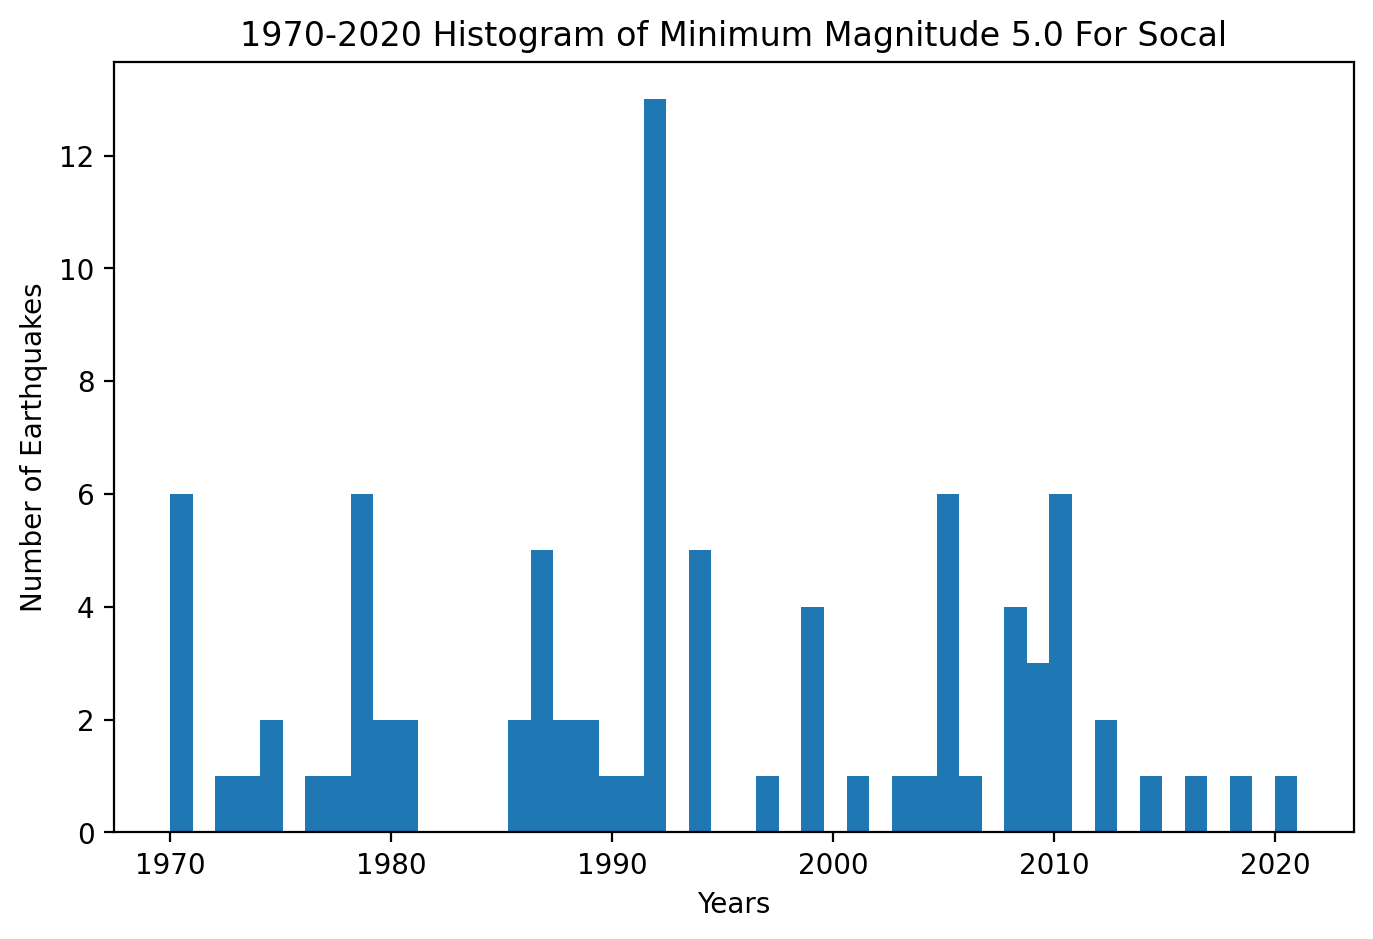

In [5]:
###Oklahoma histogram for minmag = 5.0
plt.figure(figsize=(8,5))
plt.hist(years, bins=50)
plt.xlabel('Years')
plt.ylabel('Number of Earthquakes')
plt.title('1970-2020 Histogram of Minimum Magnitude 5.0 For Socal')
plt.show()

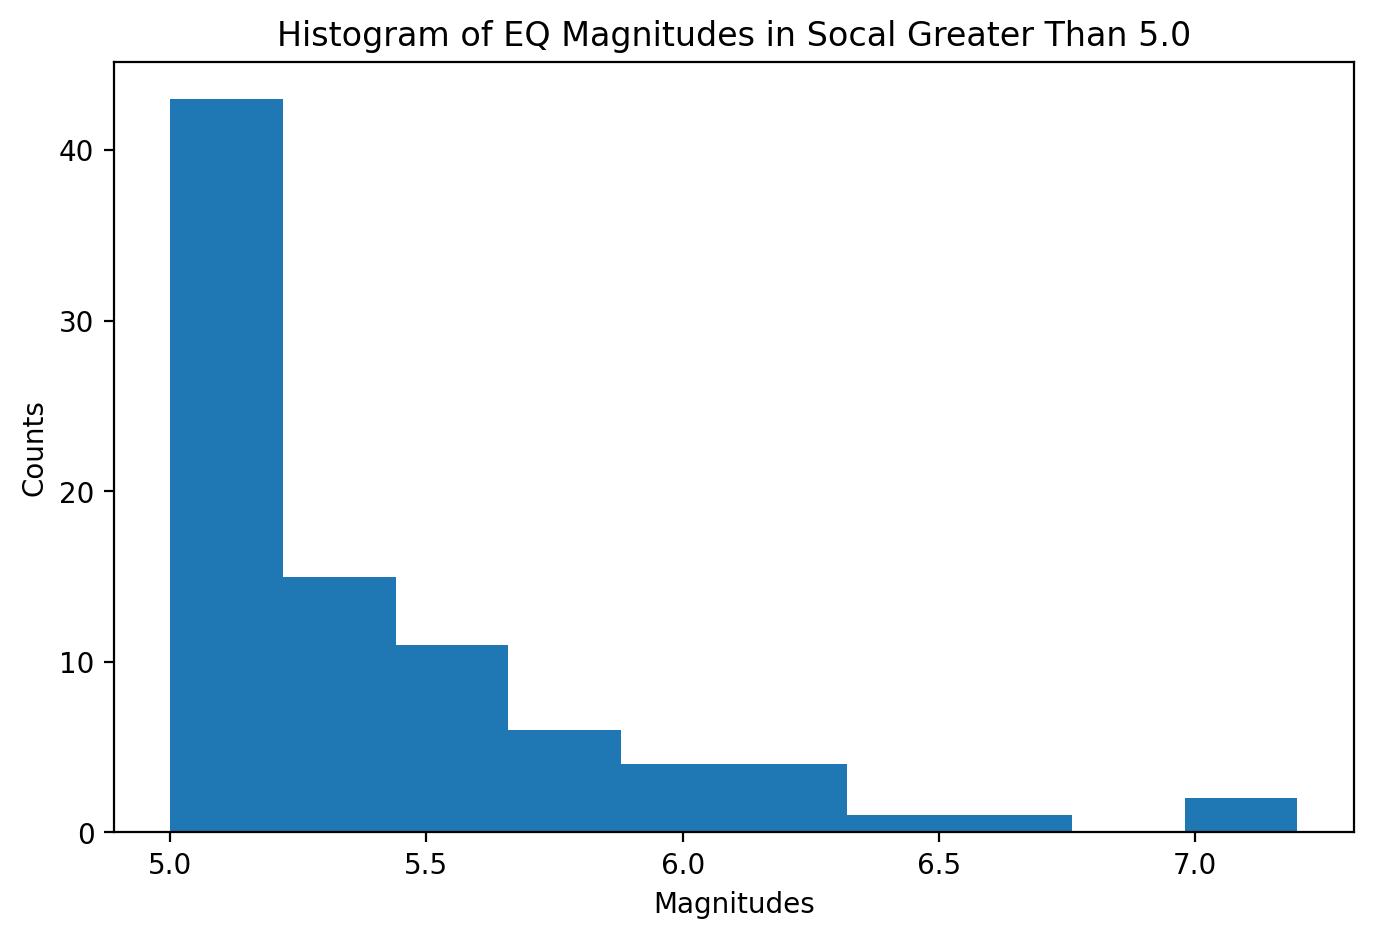

In [6]:
indices_mags_greater_6 = np.where(np.array(magnitudes) > 6)
mags_greater_6 = np.array(magnitudes)[indices_mags_greater_6]
plt.figure(figsize=(8,5))
plt.hist(magnitudes)
plt.xlabel('Magnitudes')
plt.ylabel('Counts')
plt.title('Histogram of EQ Magnitudes in Socal Greater Than 5.0')
plt.show()

In [7]:
#indices_mags_greater_6 = np.where(magnitudes > 6)
#b = np.array(magnitudes)
#b
#indices_mags_greater_6 = np.where(b > 6)
all_lats_mags_greater_6 = np.array([])
all_lons_mags_greater_6 = np.array([])
#mags_greater_6 = np.array(magnitudes)[indices_mags_greater_6]
lons_mags_greater_6 = np.array(evlon)[indices_mags_greater_6]
lats_mags_greater_6 = np.array(evlat)[indices_mags_greater_6]
#magnitudes
all_lats_mags_greater_6 = np.append(all_lats_mags_greater_6, 
                                    lats_mags_greater_6)
all_lons_mags_greater_6 = np.append(all_lons_mags_greater_6, 
                                    lons_mags_greater_6)



### Empirical relationship to calculate radius of earthquake influence
### is (in km) 10^(0.480 * M) where M is magnitude >= 3
len(lons_mags_greater_6)

8

C:\Users\Lee Lalunio\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Lee Lalunio\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Lee Lalunio\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


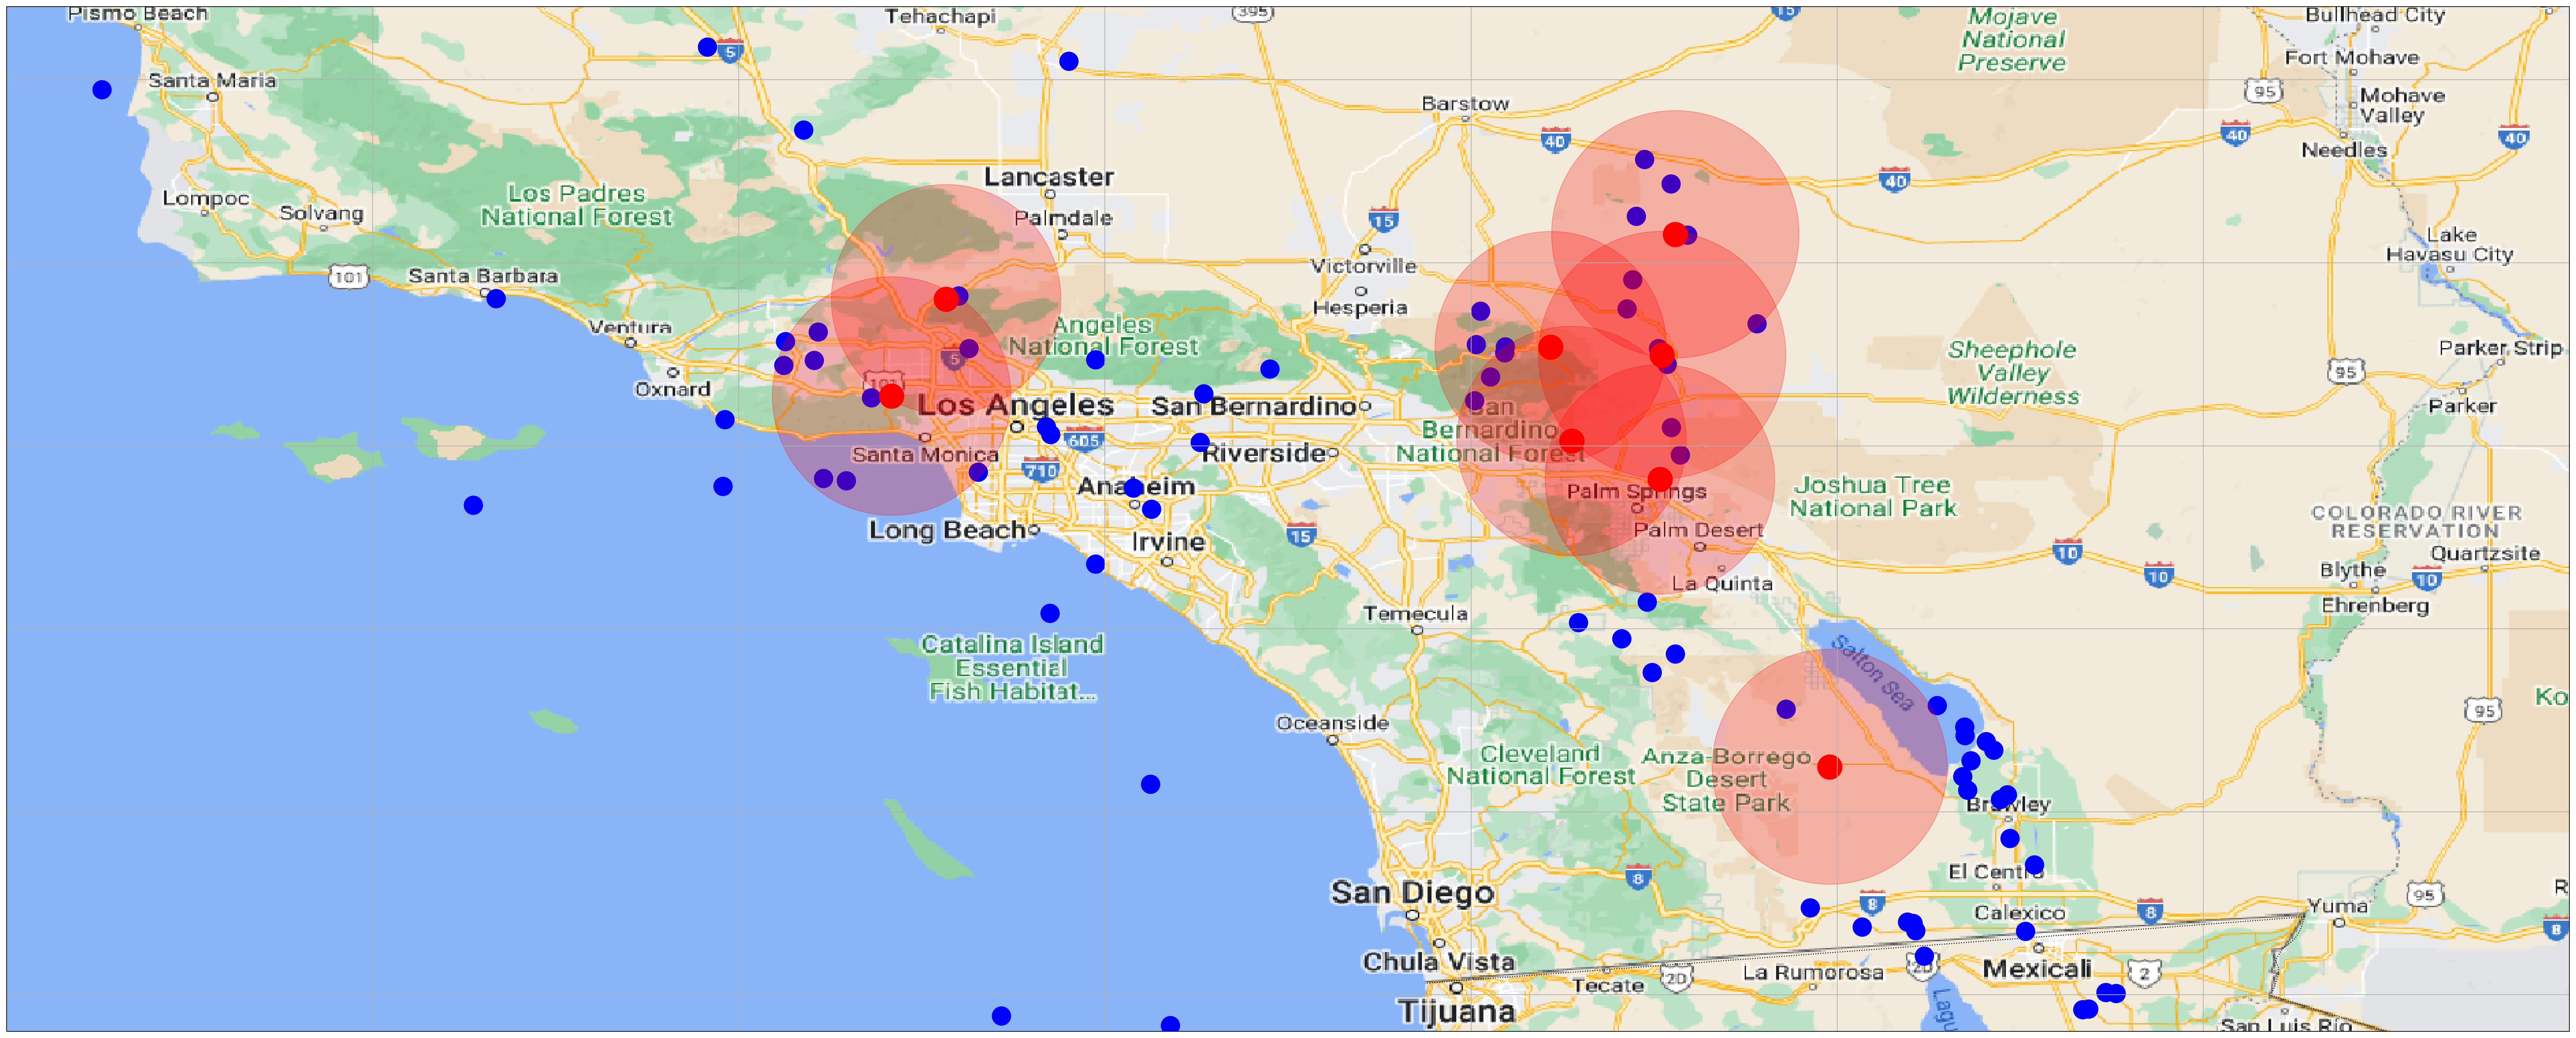

In [8]:
###Plotting Scatter on Map for 5.0
fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree())
ax.gridlines()

import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_image(request, 8)
ax.scatter(evlon, evlat, c='b',s=400,transform=ccrs.PlateCarree())
ax.scatter(lons_mags_greater_6, lats_mags_greater_6, c = 'r', s = 700, 
           transform=ccrs.PlateCarree() )
ax.scatter(lons_mags_greater_6, lats_mags_greater_6, c = 'r', s = mags_greater_6 * 20.15 * 500, alpha = 0.25,
           transform=ccrs.PlateCarree() )


### Distance from Long Beach to Irvine = 30 miles = 48.2 km
## Rc = radius for concern = danger radius
### Northridge eq of magnitude 6.7 had 135 km radius for concern
### So, 135 / 6.7 = 20.15 km per magnitude.
### s = 20000 covers diameter of around 40 km. So 20000/40 = 500 markersize per km
###

In [9]:
mags_greater_6 * 20.15 * 500

array([ 72540. ,  67502.5,  63472.5,  72540. ,  62465. ,  65487.5,
        62465. ,  62465. ])

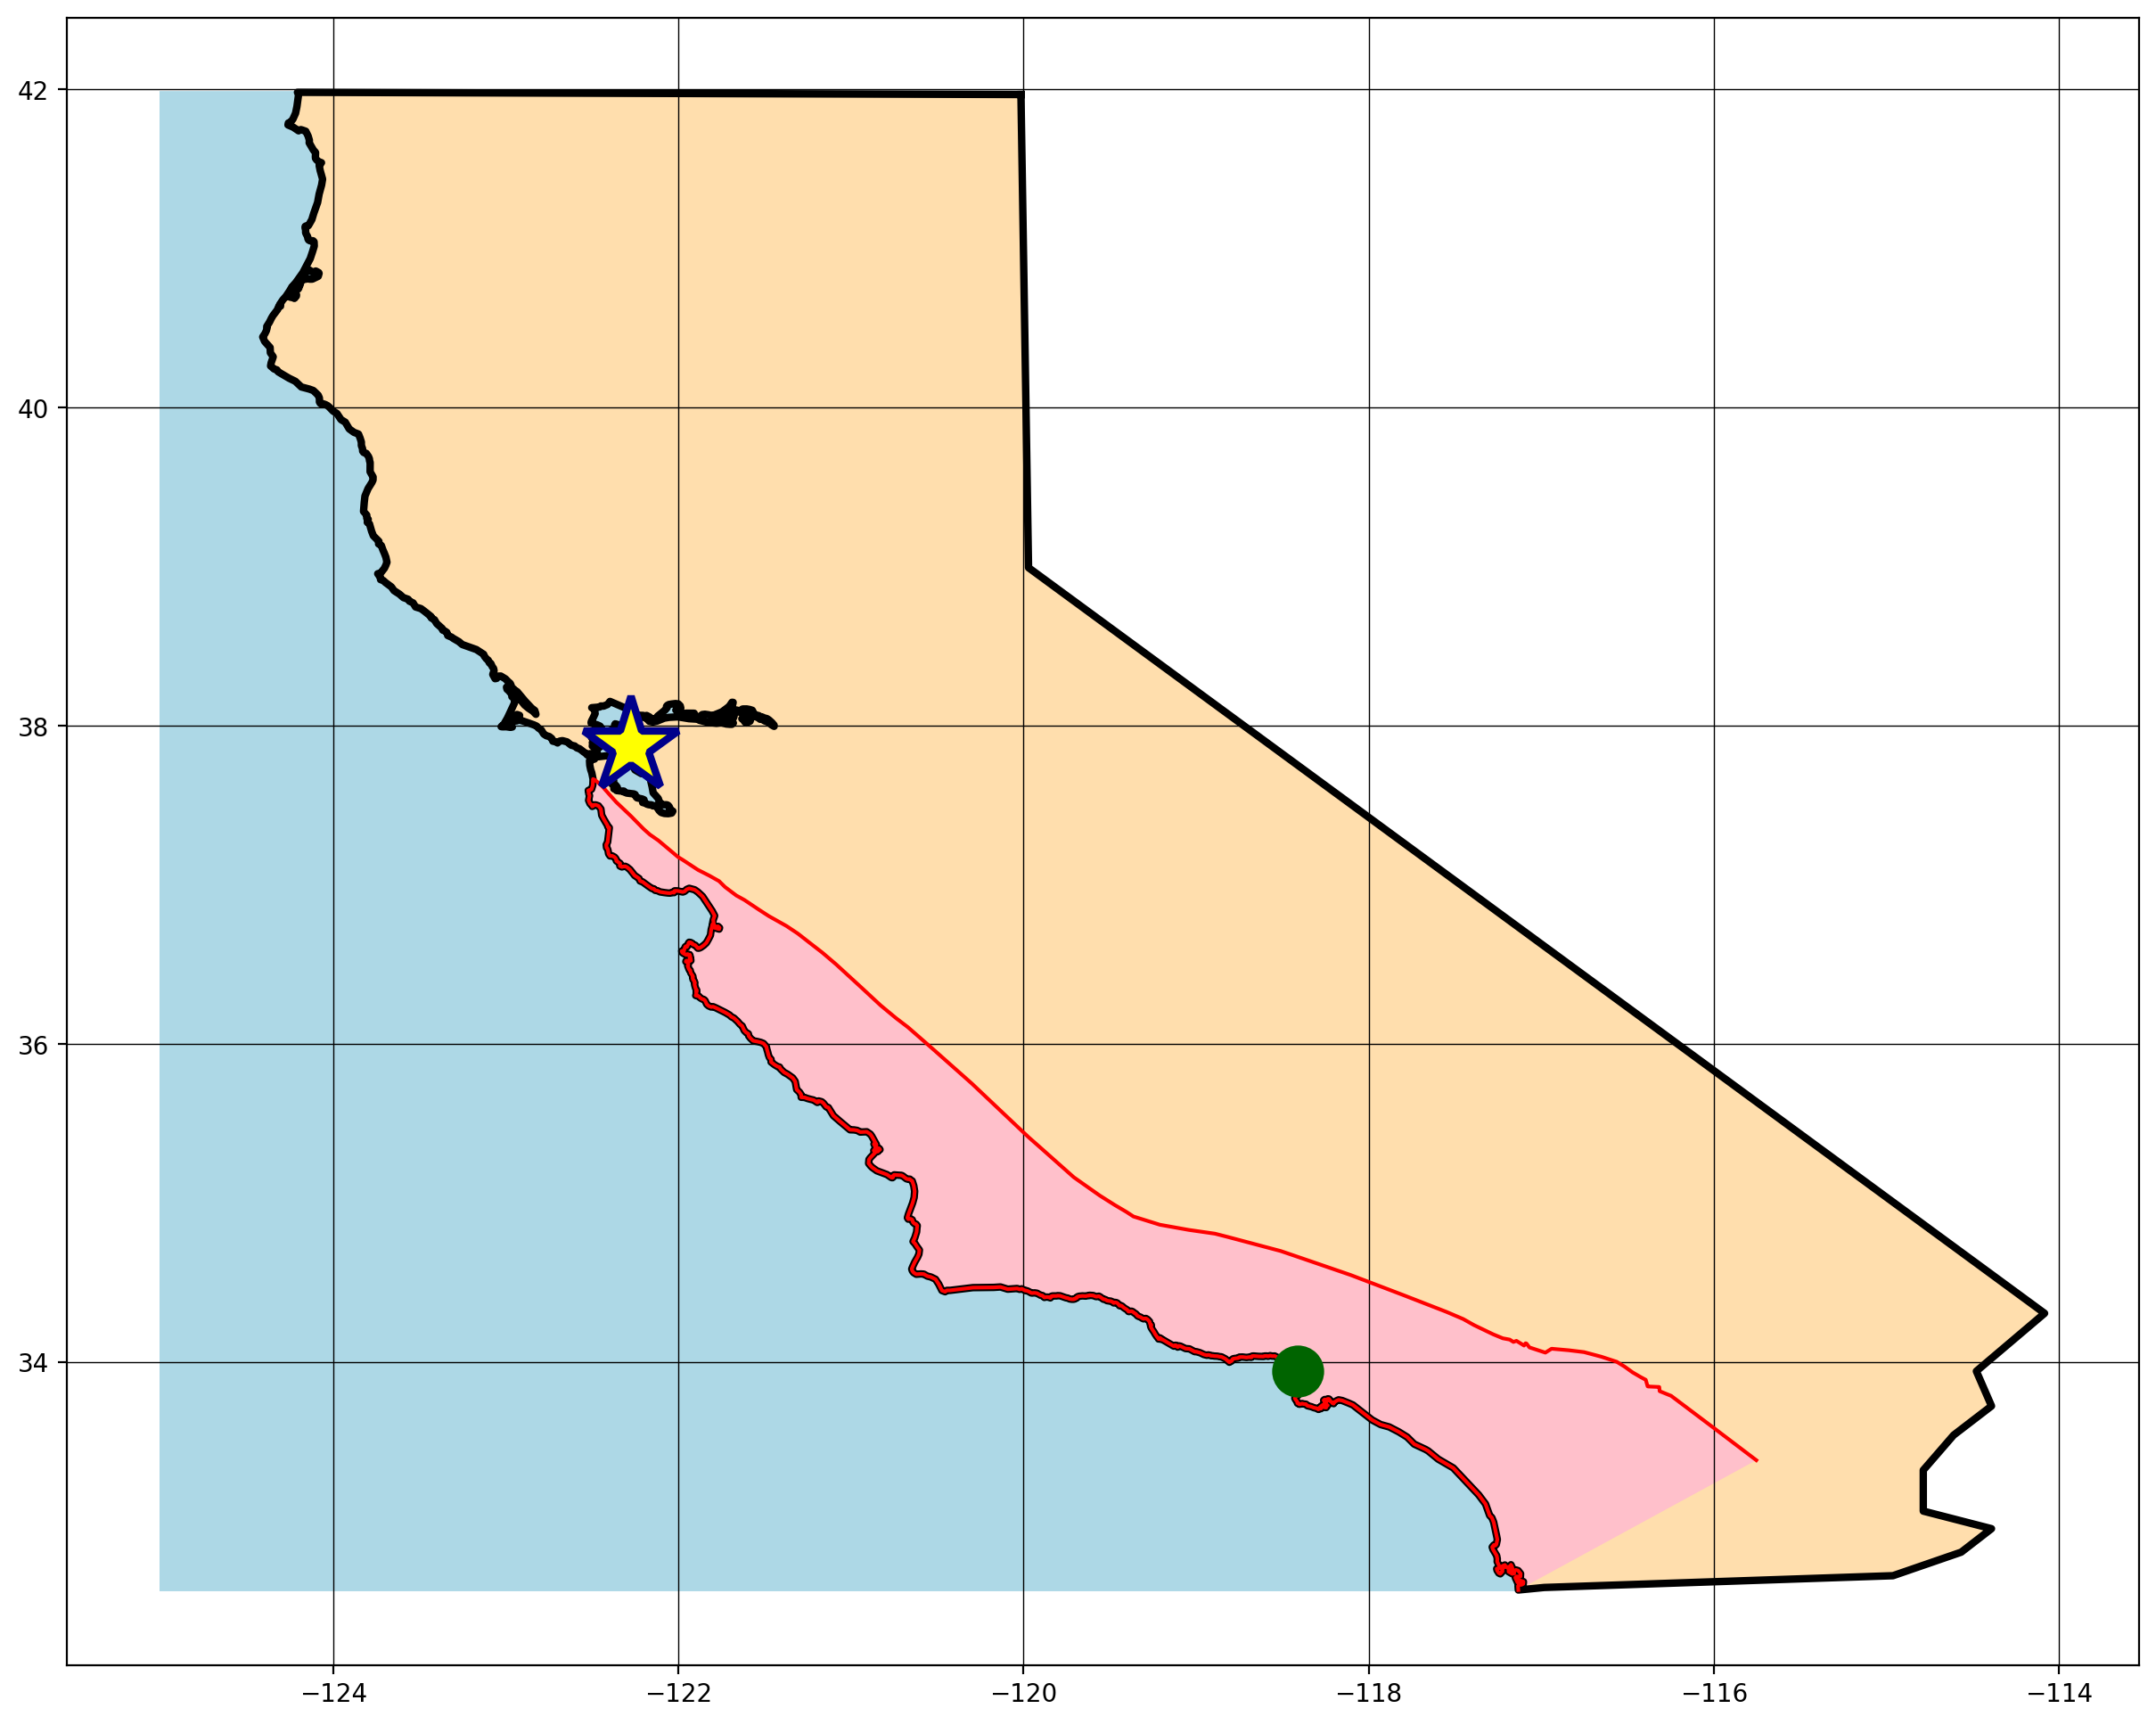

In [10]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
#print(CAC.shape,CAB.shape)

CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

plate = np.loadtxt('plate.txt', usecols=(0,1)) 
#print(plate.shape)

plt.rcParams['figure.figsize'] = [15, 12]

#plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
#plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
#plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

#plt.plot(plate[:,0],plate[:,1],'r-')
#plt.fill(plate[:,0],plate[:,1],'pink')

#plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
#plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

#plt.grid(color='k', linestyle='-', linewidth=0.5)
#plt.show()

# Northern California

In [11]:
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2022-11-01T00:00:00") #end time of the request


minLat = 36.7
maxLat = 39.5
minLon = -123
maxLon = -118.3
#minLon = -95
#maxLon = -104
minMag = 5.0
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat, maxlatitude=maxLat,
minlongitude=minLon, maxlongitude=maxLon, minmagnitude=minMag)

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2022-11-29 13:04:09.170770
Download ended:  2022-11-29 13:04:16.410100


In [12]:
# print the number of EQ and print info of the most recent one (has index=0)
print(catalog)
print('Number of earthquakes', len(catalog.events))
print(catalog[0].origins[0].latitude,catalog[0].origins[0].longitude)
print(catalog[0].origins[0].time)
print(catalog[0].magnitudes[0].mag)

64 Event(s) in Catalog:
2022-10-25T18:42:02.710000Z | +37.312, -121.672 | 5.1 Mww
2021-07-08T22:50:14.370000Z | +38.513, -119.502 | 5.2 mb
...
1974-11-28T23:01:23.780000Z | +36.779, -121.598 | 5.0 mb
1970-06-12T16:03:31.700000Z | +37.660, -122.200 | 5.8 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'
Number of earthquakes 64
37.3115 -121.672
2022-10-25T18:42:02.710000Z
5.1


In [13]:
#plt.hist(catalog.origins.time, bins = 50)
#catalog[0].origins[0].time
evlat =[]
evlon =[]
evdep =[]
evmag = []
index = 0
years = []
magnitudes = []

for eve in catalog:
    event = catalog[index]
    org = event.origins
    mags = event.magnitudes
    magnitudes.append(mags[0].mag)
    evlat.append(org[0].latitude)
    evlon.append(org[0].longitude)
    #print(org[0].depth)
    years.append(org[0].time.year)
    if (org[0].depth==None):
        evdep.append(0.0)
    else:
        evdep.append((org[0].depth) / 1000.0)
    evmag.append((event.magnitudes[0].mag)**4/2)
    index+=1
    
#years

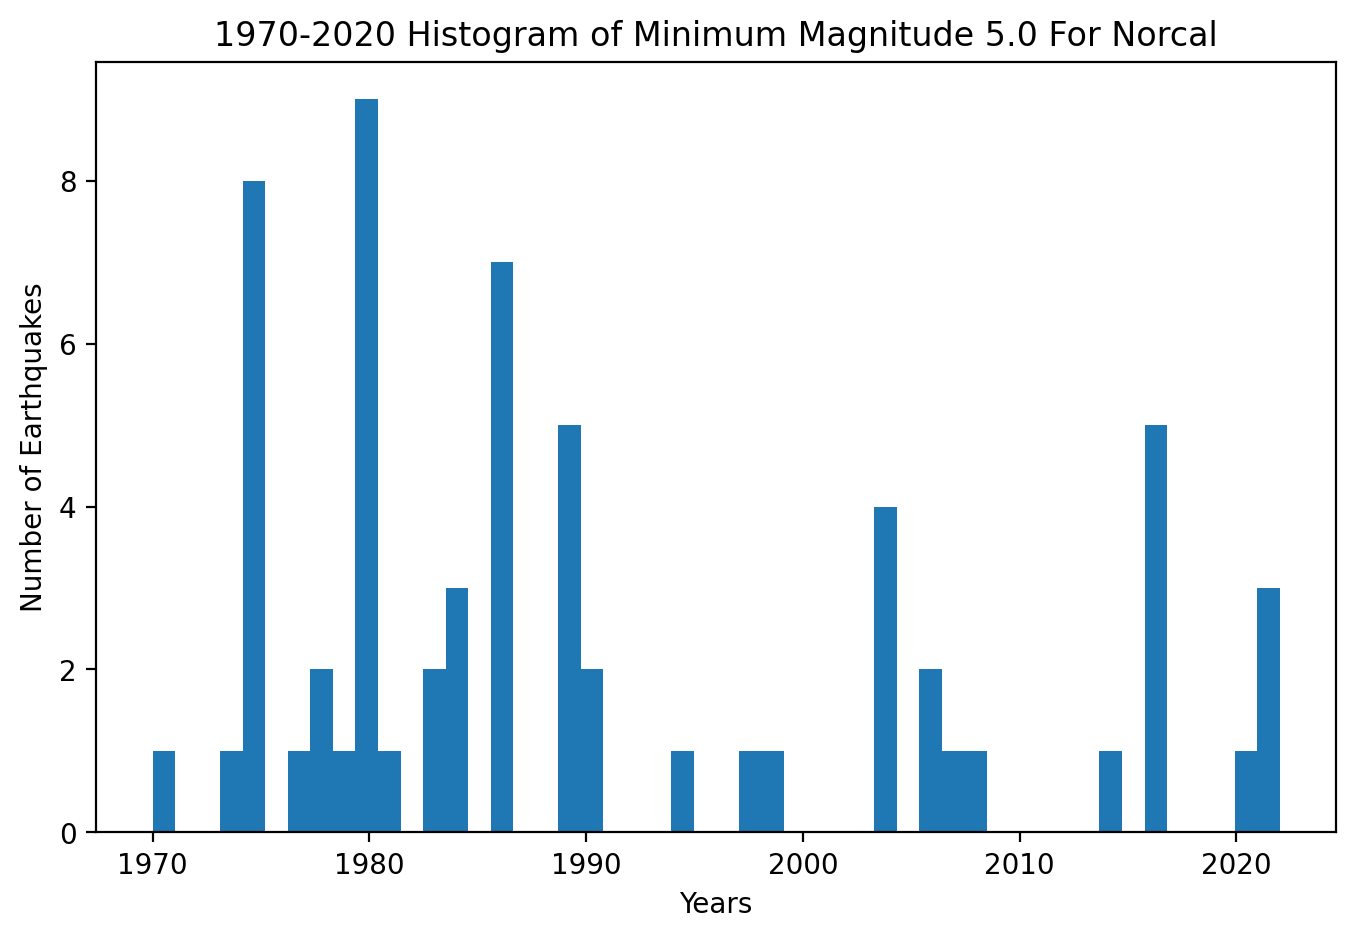

In [14]:
###Oklahoma histogram for minmag = 5.0
plt.figure(figsize=(8,5))
plt.hist(years, bins=50)
plt.xlabel('Years')
plt.ylabel('Number of Earthquakes')
plt.title('1970-2020 Histogram of Minimum Magnitude 5.0 For Norcal')
plt.show()

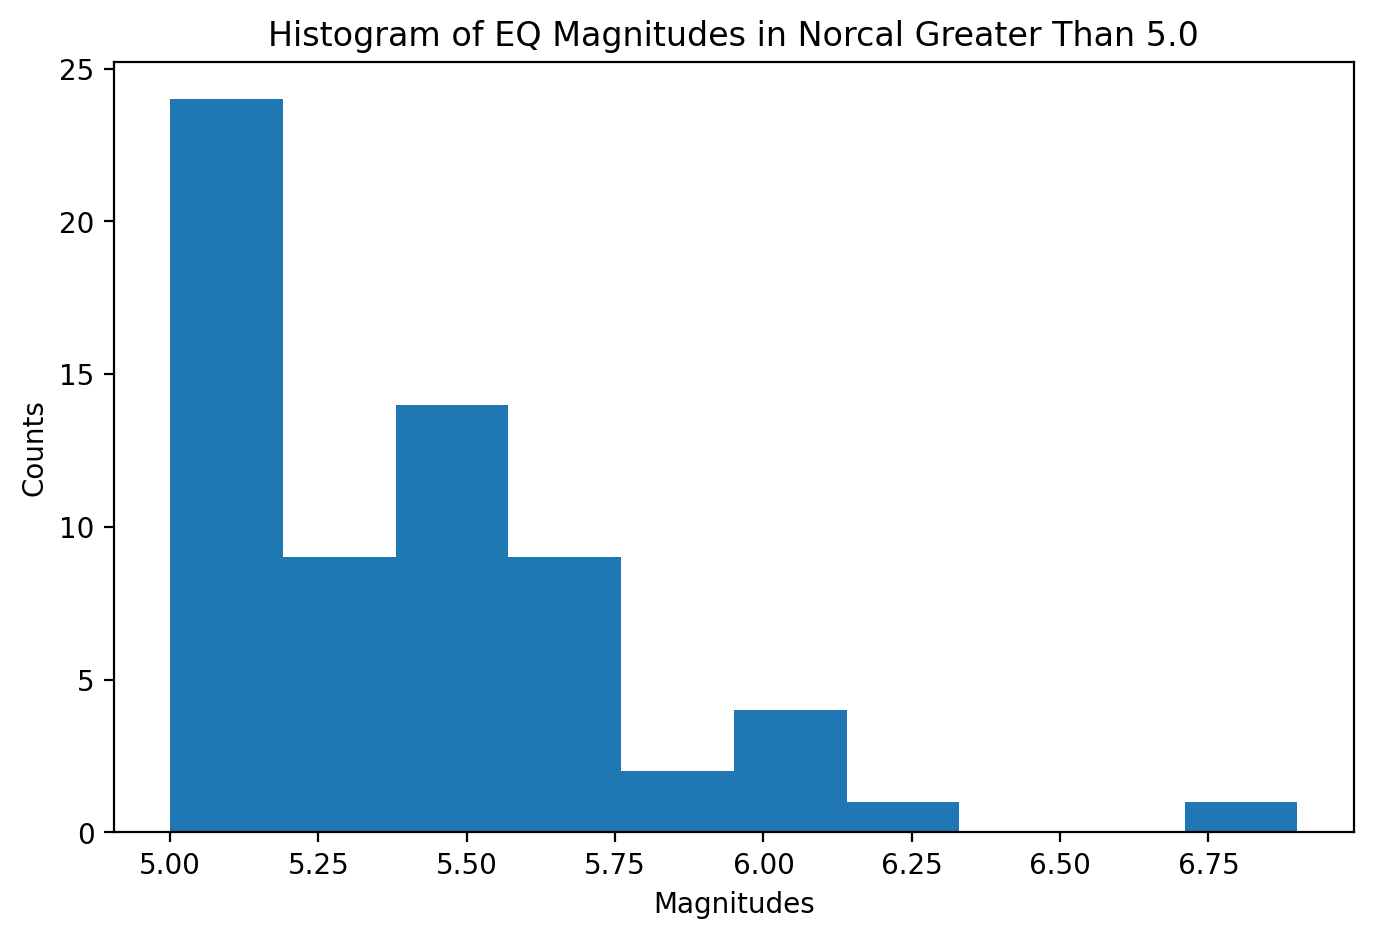

In [15]:
indices_mags_greater_6 = np.where(np.array(magnitudes) > 6)
mags_greater_6 = np.array(magnitudes)[indices_mags_greater_6]
plt.figure(figsize=(8,5))
plt.hist(magnitudes)
plt.xlabel('Magnitudes')
plt.ylabel('Counts')
plt.title('Histogram of EQ Magnitudes in Norcal Greater Than 5.0')
plt.show()

In [16]:
#indices_mags_greater_6 = np.where(magnitudes > 6)
#b = np.array(magnitudes)
#b
#indices_mags_greater_6 = np.where(b > 6)
#mags_greater_6 = np.array(magnitudes)[indices_mags_greater_6]
lons_mags_greater_6 = np.array(evlon)[indices_mags_greater_6]
lats_mags_greater_6 = np.array(evlat)[indices_mags_greater_6]
#magnitudes
all_lats_mags_greater_6 = np.append(all_lats_mags_greater_6, 
                                    lats_mags_greater_6)
all_lons_mags_greater_6 = np.append(all_lons_mags_greater_6, 
                                    lons_mags_greater_6)

### Empirical relationship to calculate radius of earthquake influence
### is (in km) 10^(0.480 * M) where M is magnitude >= 3
len(lons_mags_greater_6)

5

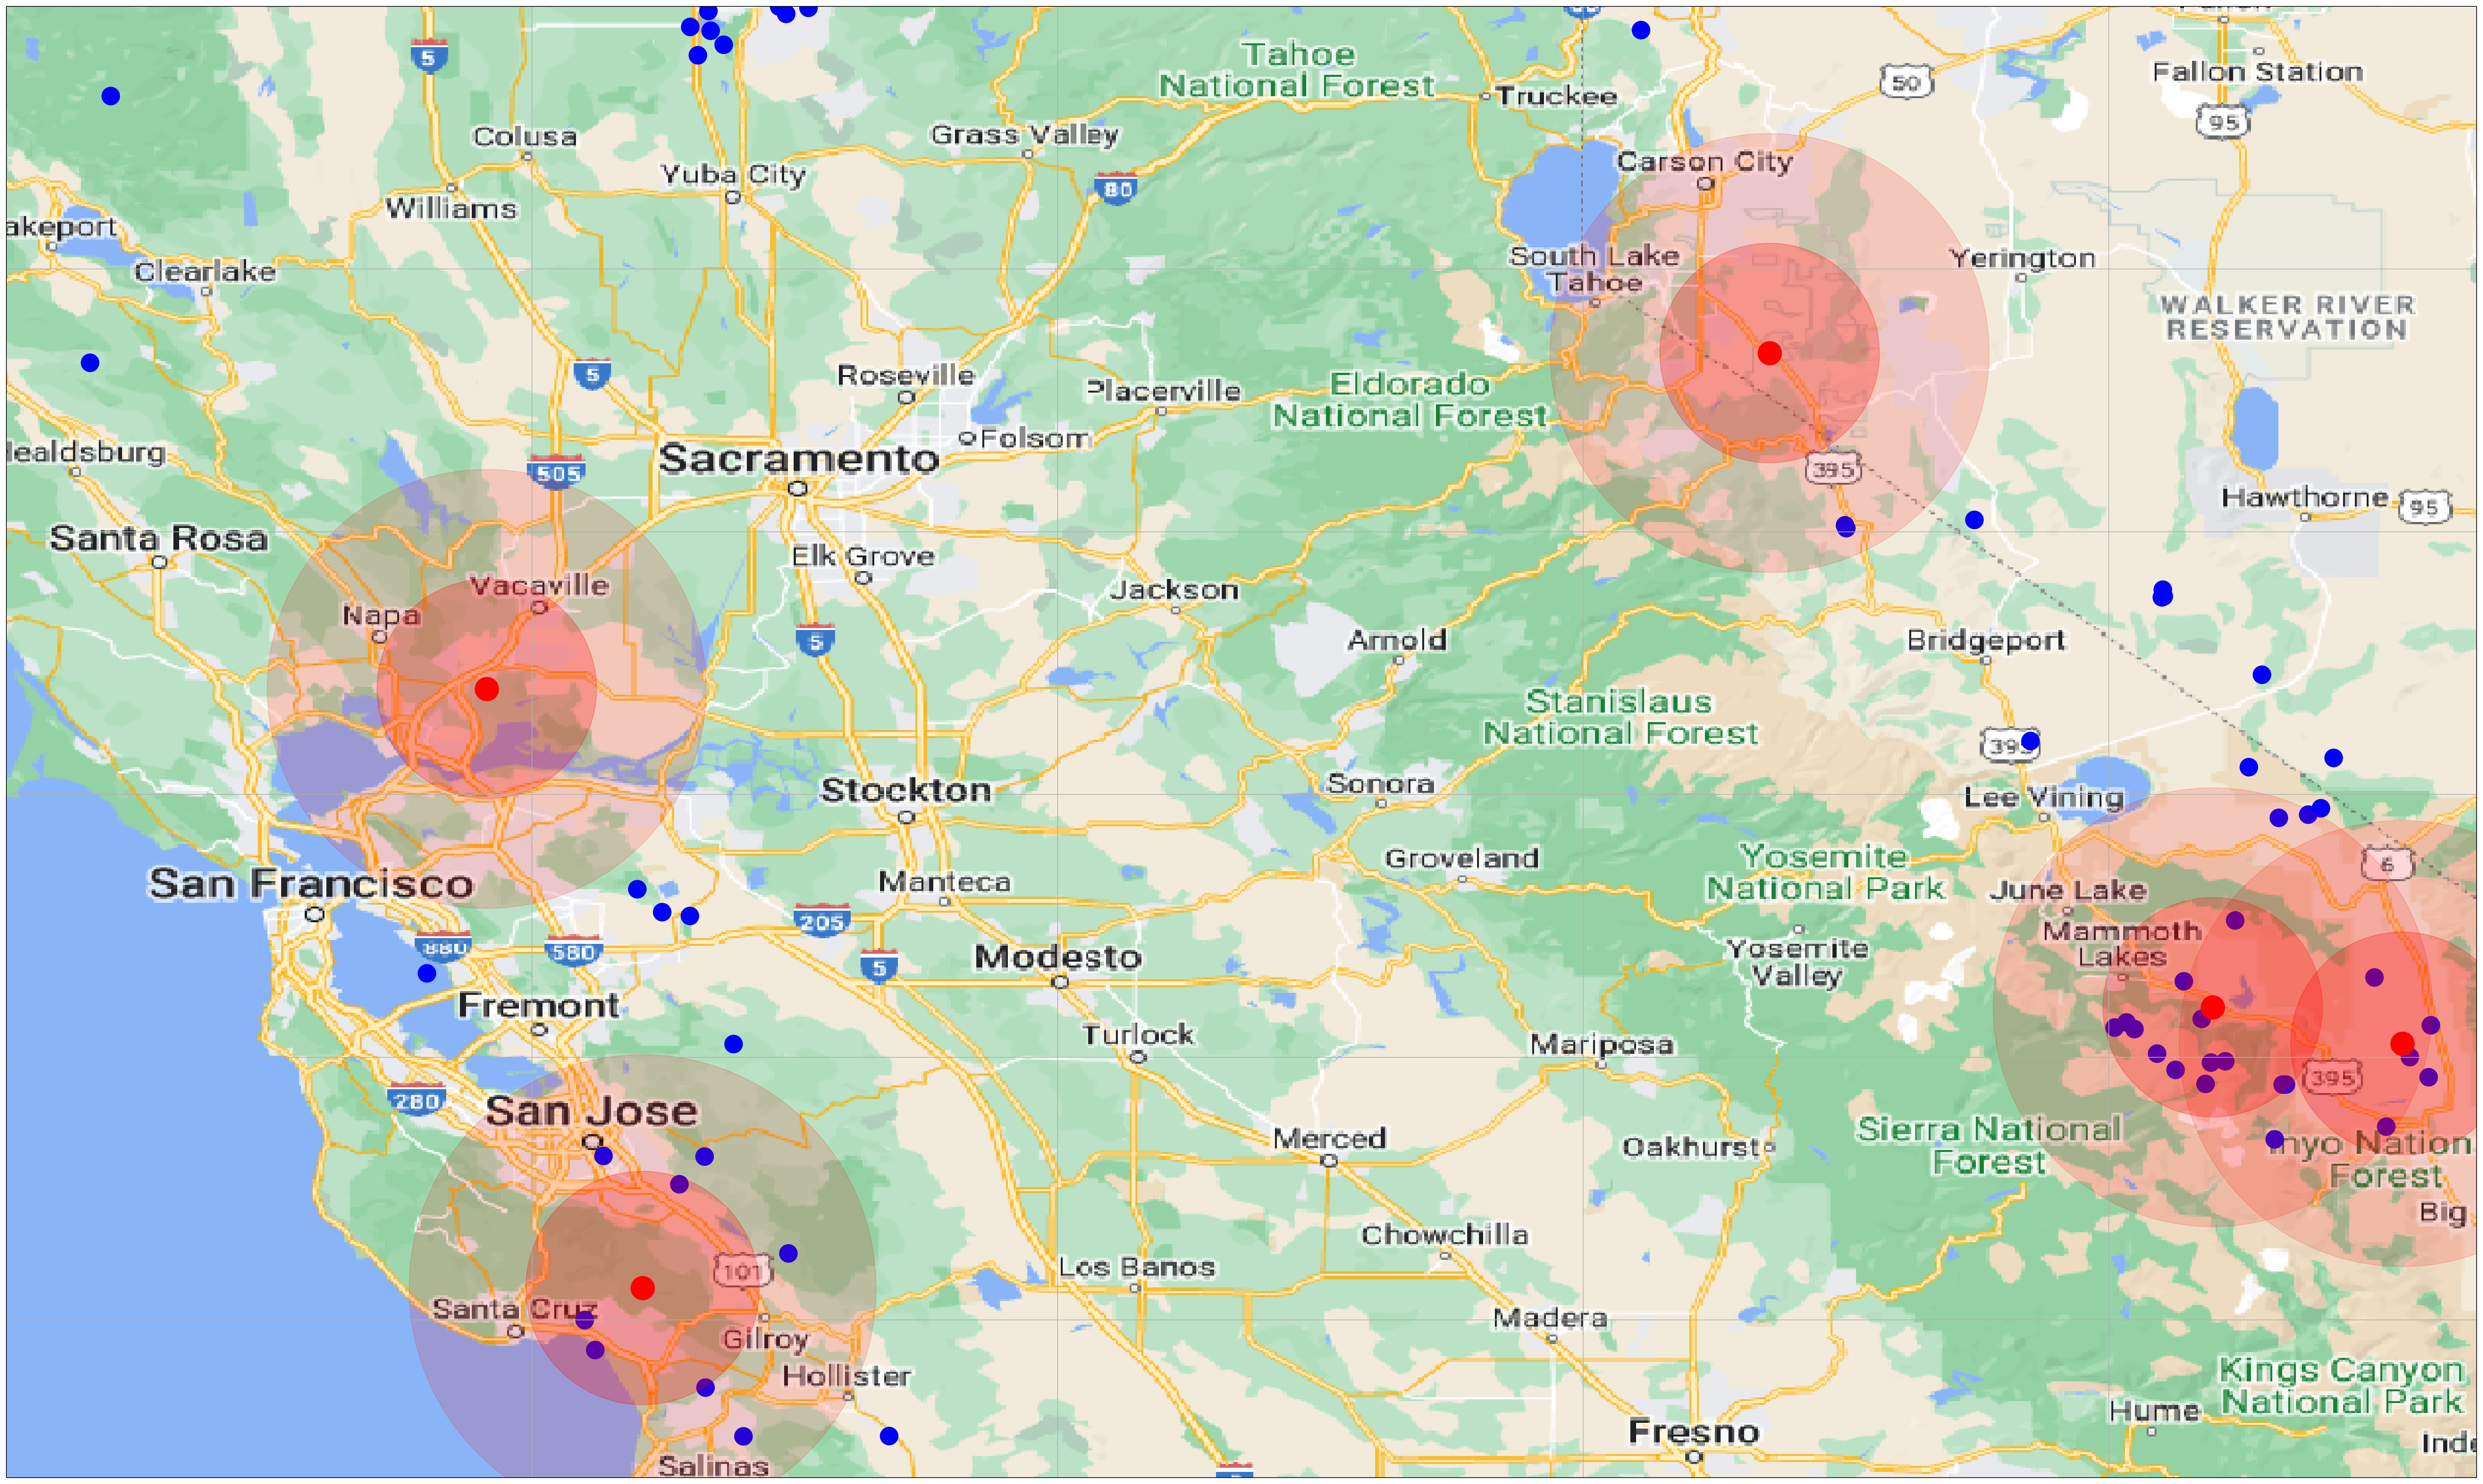

In [17]:
###Plotting Scatter on Map for 5.0 and greater
fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree())
ax.gridlines()

import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_image(request, 8)
ax.scatter(evlon, evlat, c='b',s=400,transform=ccrs.PlateCarree())
ax.scatter(lons_mags_greater_6, lats_mags_greater_6, c = 'r', s = 700, 
           transform=ccrs.PlateCarree() )
ax.scatter(lons_mags_greater_6, lats_mags_greater_6, c = 'r', s = mags_greater_6 * 20.15 * 500, alpha = 0.25,
           transform=ccrs.PlateCarree() )
ax.scatter(lons_mags_greater_6, lats_mags_greater_6, c = 'r', s = mags_greater_6 * 20.15 * 2000, alpha = 0.15,
           transform=ccrs.PlateCarree() ) ### This more transparent radius gets not as severe damage
## as the smaller red circle; but still really severe damage since soil is really unstable
## in Bay area


### Distance from Long Beach to Irvine = 30 miles = 48.2 km
## Rc = radius for concern = danger radius
### Northridge eq of magnitude 6.7 had 135 km radius for concern
### So, 135 / 6.7 = 20.15 km per magnitude.
### s = 20000 covers diameter of around 40 km. So 20000/40 = 500 markersize per km
###

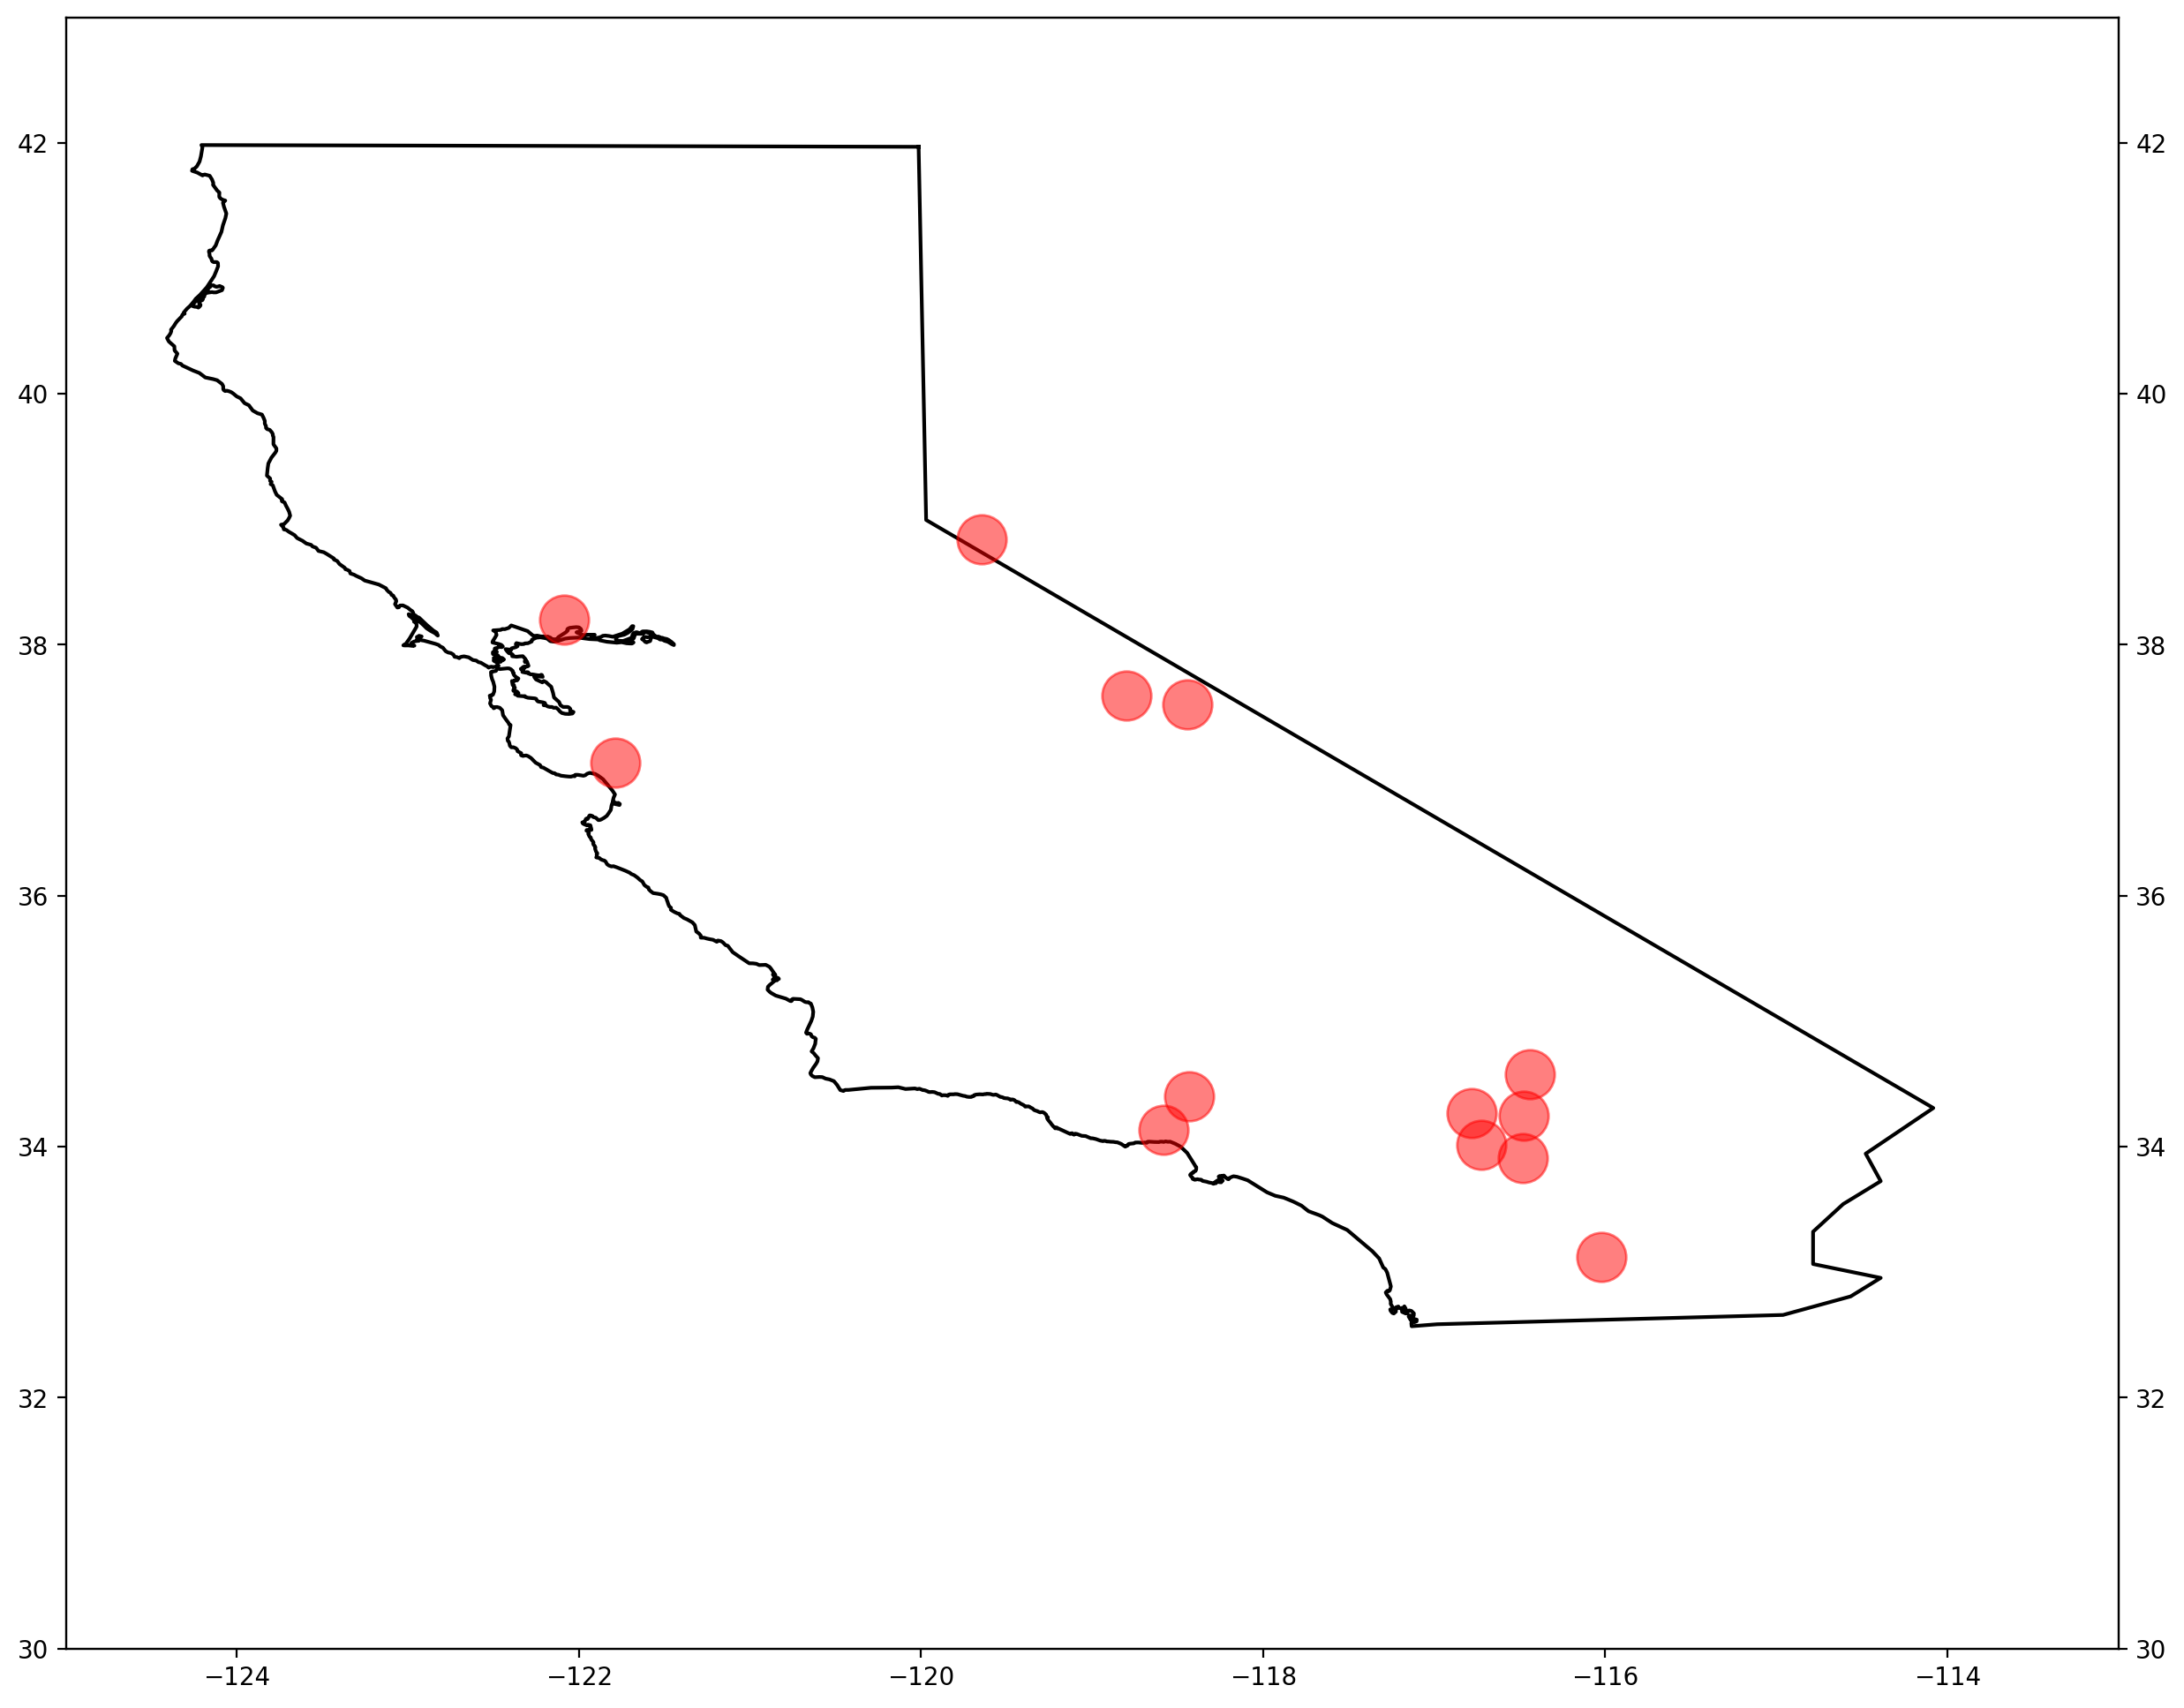

In [19]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111)
l, = ax.plot([], [], 'k-')
#ax = fig.add_subplot(111)
ax2 = ax.twinx()
m = ax2.plot([], [], 'o')[0]

#plt.xlim(-125, -113)
#plt.ylim(30, 43)

ax.set_ylim(30, 43)
ax.set_xlim(-125, -113)

ax2.set_ylim(30, 43)
ax2.set_xlim(-125, -113)

x0, y0 = 0, 0
x00 = []
y00 = []

x002 = []
y002 = []
n = CAB.shape[0]
CAB_2x = CAB[0:n,0]   ###Longitude, on the x-axis
CAB_2y = CAB[0:n,1]   ### LAtitude, on the y-axis


with writer.saving(fig, "project_vid.mp4", 100):
    nff = len(all_lons_mags_greater_6)
    nf = n #len(CAB)
    for i in range(nf):
        #x0 += 0.1 #* np.random.randn()
        #y0 += 0.1 #* np.random.randn()
        x0 = CAB_2x[i]
        y0 = CAB_2y[i]
        x00 = np.append(x00, x0)
        y00 = np.append(y00, y0)
        #l.set_data(x00, y00)
        #plt.pause(0.05)
        if(i % 10 == 0):
            l.set_data(x00, y00)
            writer.grab_frame()
        if(i < 10): ### Gets 1st 10 frames
            l.set_data(x00, y00)
            writer.grab_frame()
        if(i <= nf-1 and i >= nf - 8): ###Gets last 8
            l.set_data(x00, y00)
            writer.grab_frame()
    for i in range(5):
        writer.grab_frame() ### Little Pause before putting socal eqs
    m.set_markersize(20) 
    m.set_alpha(0.5)
    m.set_color('r')
    m.set_marker('o')
    for j in range(nff):
        x0 = all_lons_mags_greater_6[j]
        y0 = all_lats_mags_greater_6[j]
        x002 = np.append(x002, x0)
        y002 = np.append(y002, y0)
        m.set_data(x002, y002)
        for i in range(5):
            writer.grab_frame()
        